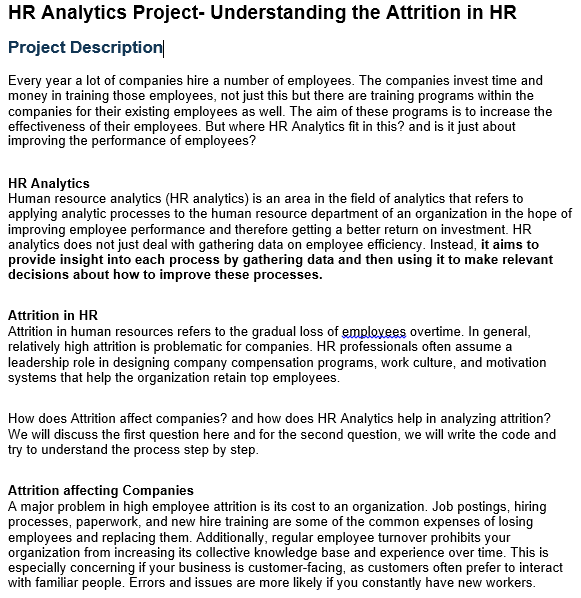

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.zip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from scipy import stats

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'E:\D\Data Trained\project\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# no null, some objetive data present

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# emloyee count have only 1 

In [7]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
# Over18 have only 1 unique value

### EDA

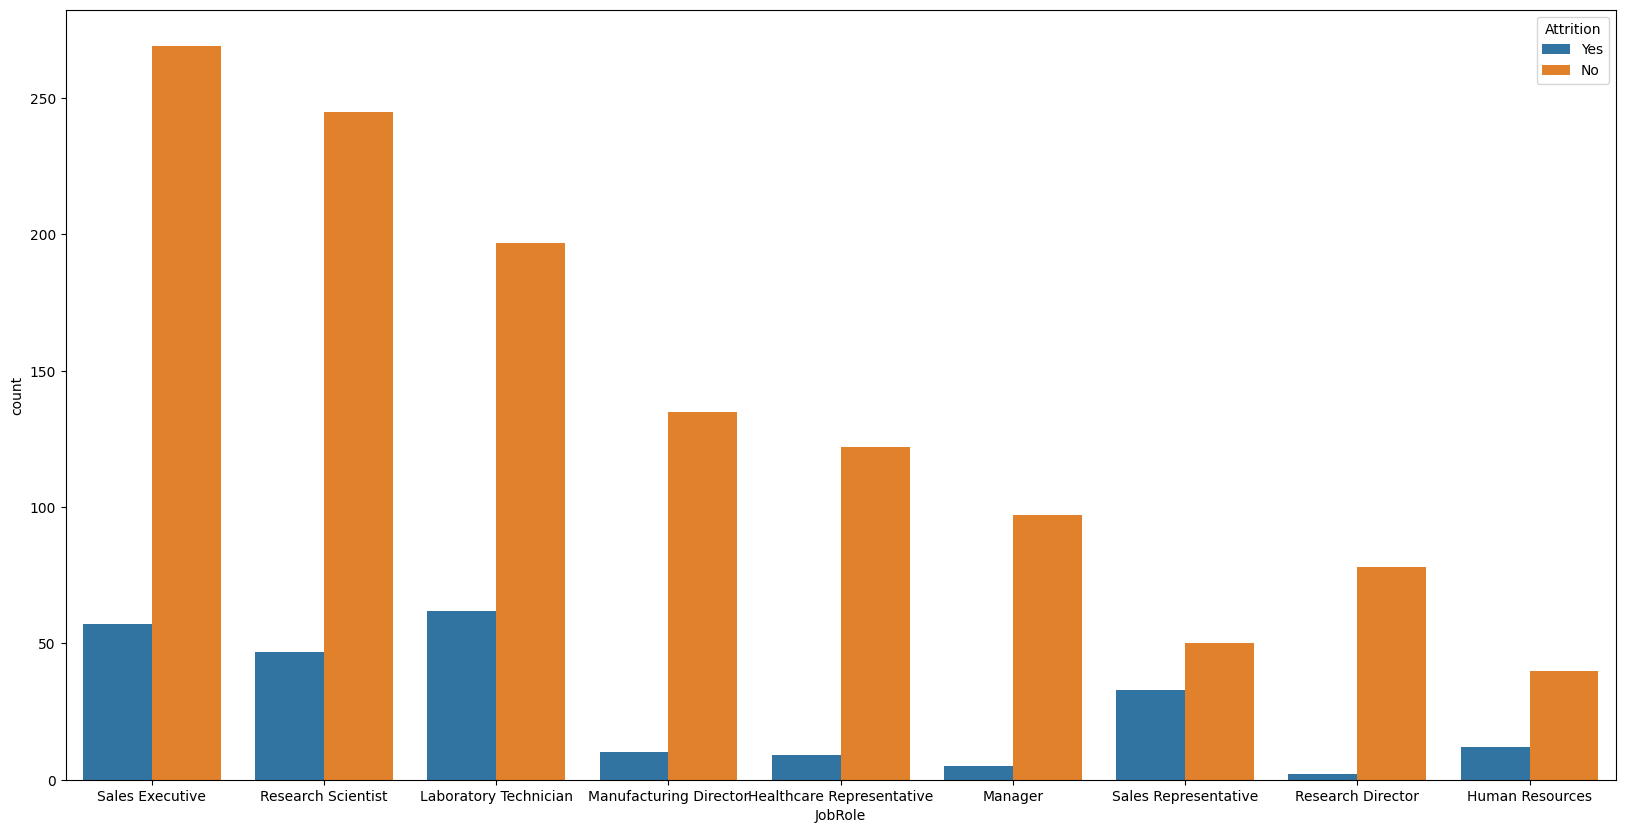

In [29]:
plt.figure(figsize=(20,10), facecolor='white')
sns.countplot(hue='Attrition', x='JobRole', data=df)
plt.show()

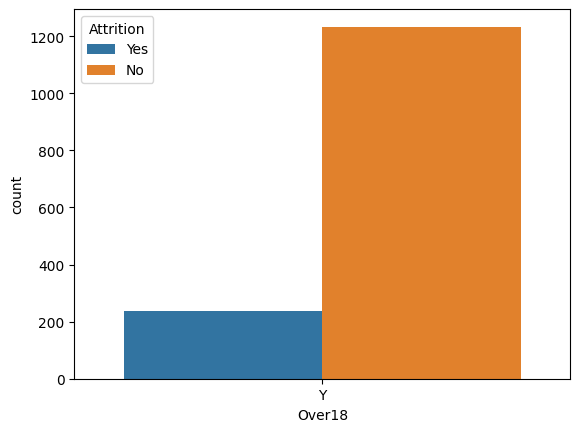

In [22]:

sns.countplot(hue=df.Attrition,x=df.Over18)
plt.show()

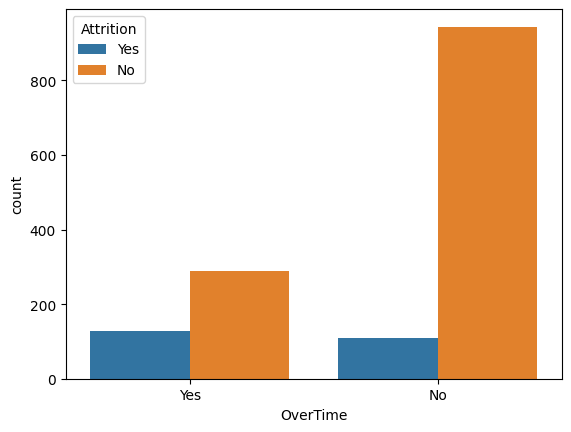

In [20]:

sns.countplot(hue=df.Attrition,x=df.OverTime)
plt.show()

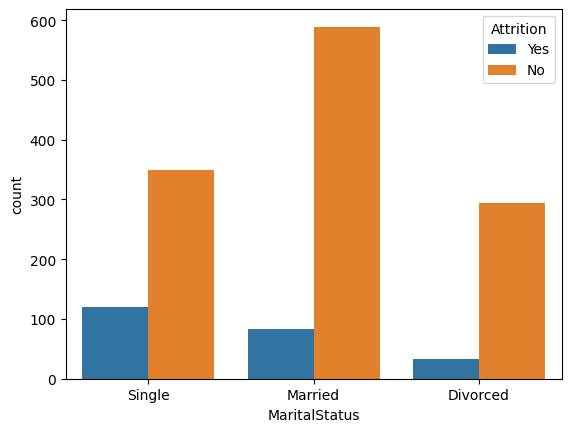

In [19]:

sns.countplot(hue=df.Attrition,x=df.MaritalStatus)
plt.show()

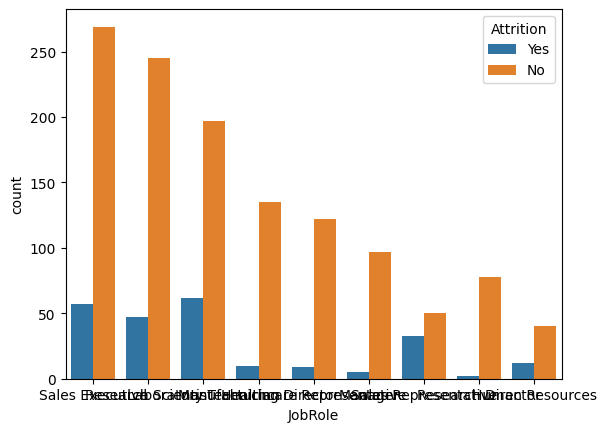

In [18]:

sns.countplot(hue=df.Attrition,x=df.JobRole)
plt.show()

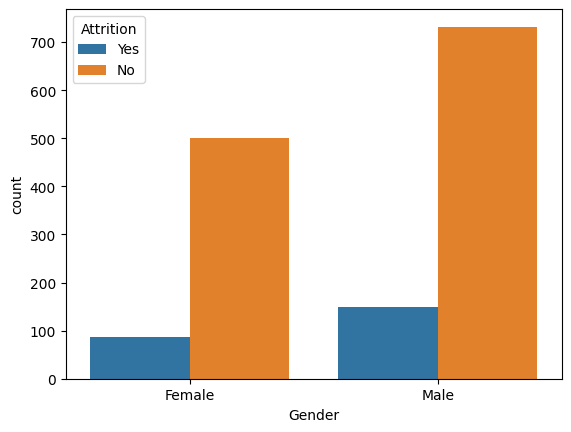

In [17]:

sns.countplot(hue=df.Attrition,x=df.Gender)
plt.show()

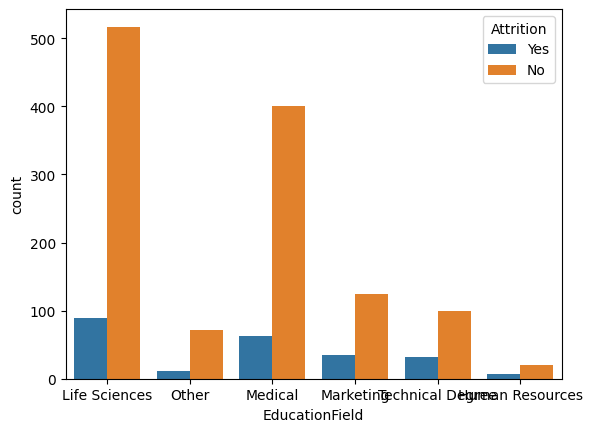

In [16]:

sns.countplot(hue=df.Attrition,x=df.EducationField)
plt.show()

Attrition
No     1233
Yes     237
Name: count, dtype: int64


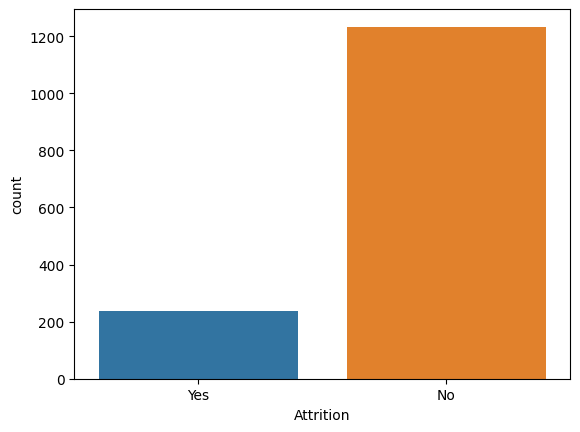

In [13]:
print(df['Attrition'].value_counts())
sns.countplot(x=df.Attrition)
plt.show()

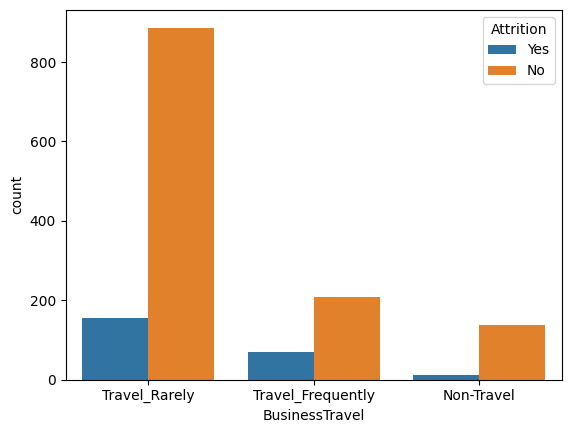

In [14]:

sns.countplot(hue=df.Attrition,x=df.BusinessTravel)
plt.show()

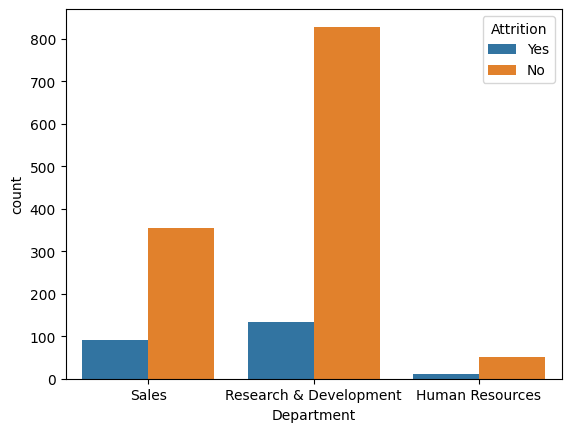

In [15]:

sns.countplot(hue=df.Attrition,x=df.Department)
plt.show()

In [31]:
num_col=[]
for column in df.columns:
    if df[column].dtype=='int64'and len(df[column].unique())>=10: # for continues feature we use unique>=10
        num_col.append(column)


In [34]:
df[num_col]

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,94,5993,19479,8,11,8,6,4,0,5
1,49,279,8,2,61,5130,24907,1,23,10,10,7,1,7
2,37,1373,2,4,92,2090,2396,6,15,7,0,0,0,0
3,33,1392,3,5,56,2909,23159,1,11,8,8,7,3,0
4,27,591,2,7,40,3468,16632,9,12,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2061,41,2571,12290,4,17,17,5,2,0,3
1466,39,613,6,2062,42,9991,21457,4,15,9,7,7,1,7
1467,27,155,4,2064,87,6142,5174,1,20,6,6,2,0,3
1468,49,1023,2,2065,63,5390,13243,2,14,17,9,6,0,8


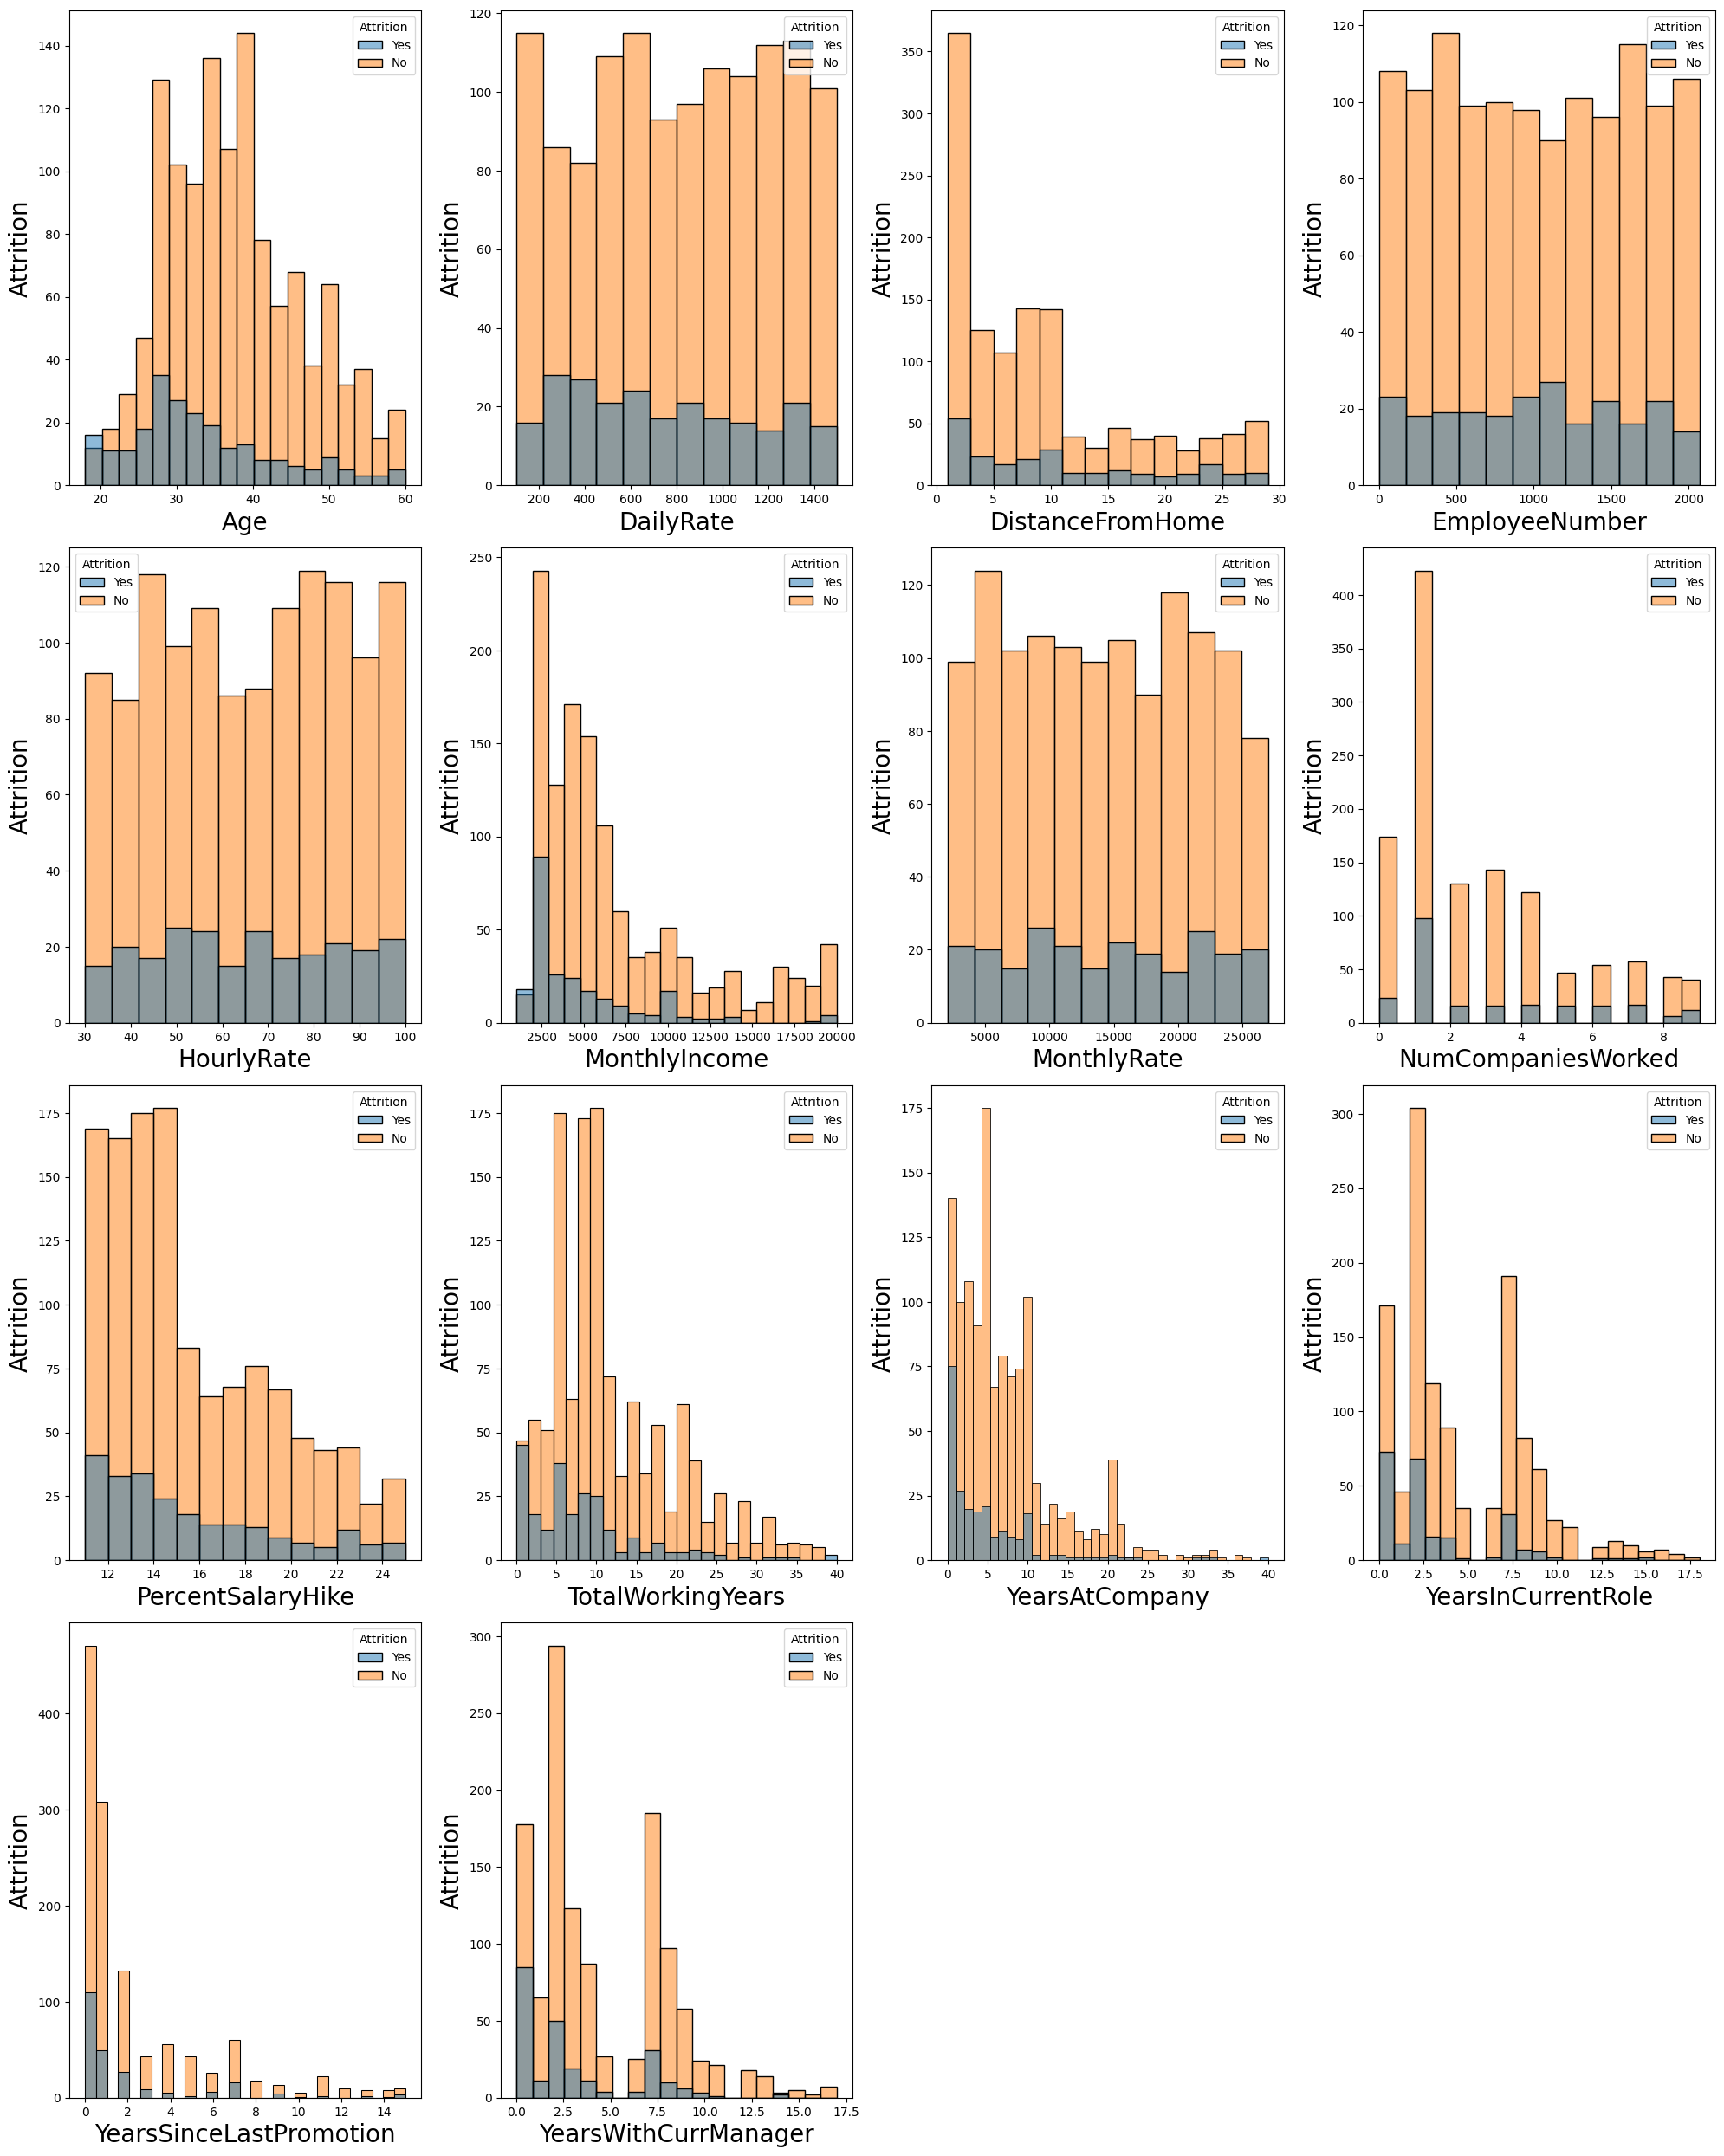

In [35]:

plt.figure(figsize=(20,25),facecolor='white')

p = 1

for i in df[num_col]:
    if p <= 16:
        axs = plt.subplot(4, 4, p)  
        sns.histplot(x=df[i], hue=df['Attrition'])
        plt.xlabel(i, fontsize=20)  # Corrected to use column name as label
        plt.ylabel('Attrition', fontsize=20)
        
        p += 1
plt.tight_layout()
plt.show()


In [36]:
# Encoding catogorical column using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Feature selection

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   float64
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [38]:
df.drop(['EmployeeCount','EmployeeNumber','Over18', 'StandardHours'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   float64
 14  JobSatis

In [39]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [40]:
# oversampling the data 
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)
x1
y1

# in Oversampling SMOTE will create new lines to balance the data
# in UnderSampling SMOTe will remove the lines or rows to balance the ratio of y 

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
2461    1.0
2462    1.0
2463    1.0
2464    1.0
2465    1.0
Name: Attrition, Length: 2466, dtype: float64

In [43]:
y.value_counts()

Attrition
0.0    1233
1.0     237
Name: count, dtype: int64

In [44]:
y1.value_counts()

Attrition
1.0    1233
0.0    1233
Name: count, dtype: int64

In [ ]:
### Train test split

In [45]:
# Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    Pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,Pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best Accuracy is : ",maxAccu,"at random state : ",maxRS)

Best Accuracy is :  0.9696356275303644 at random state :  183


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20, random_state=maxRS)

In [48]:
# Random Forest classifier 
from sklearn.metrics import confusion_matrix
# Checking accuracy for RandoForestClassifier 

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
PredRFC=RFC.predict(x_test)
print(accuracy_score(y_test,PredRFC))
print(confusion_matrix(y_test,PredRFC))
print(classification_report(y_test,PredRFC))

0.9595141700404858
[[250   6]
 [ 14 224]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       256
         1.0       0.97      0.94      0.96       238

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494



In [50]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))

0.8866396761133604
[[214  42]
 [ 14 224]]
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.88       256
         1.0       0.84      0.94      0.89       238

    accuracy                           0.89       494
   macro avg       0.89      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494



In [ ]:
## cross validation

In [53]:
# Cross Vaidation method

from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print( "Difference between Accuracy score and cross validation score is : ", accuracy_score(y_test,PredRFC)-score.mean())

[0.69230769 0.97363083 0.97768763 0.96754564 0.97971602]
0.9181775628023093
Difference between Accuracy score and cross validation score is :  0.04133660723817645


In [54]:
# checking CV score for Extra Tree

score=cross_val_score(DT,x1,y1)
print(score)
print(score.mean())
print( "Difference between Accuracy score and cross validation score is : ", accuracy_score(y_test,pred_DT)-score.mean())

[0.65587045 0.89249493 0.89452333 0.89655172 0.92494929]
0.8528779430242011
Difference between Accuracy score and cross validation score is :  0.03376173308915931


In [ ]:
## DT is our best Model as cross validation score is least as compare to other model

In [ ]:
## Hyper parmeter tuning

In [61]:
# Define the parameter grid for DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the classifier
clf = DecisionTreeClassifier()

# Initialize GridSearchCV
GCV = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the model
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [62]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [63]:
Final_model=DecisionTreeClassifier(criterion='gini',max_depth=20,max_features=None,min_samples_leaf=4,min_samples_split=2)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.09311740890689


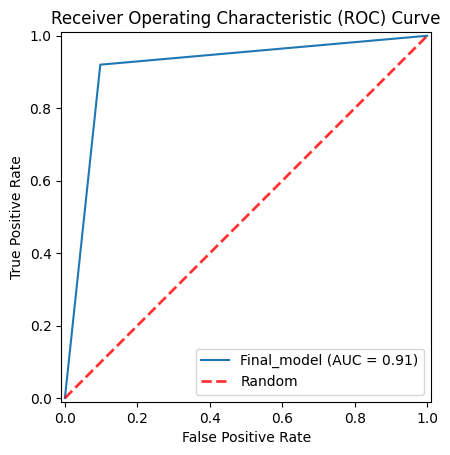

In [64]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming `pred` is your model's predictions and `y_test` is the actual labels
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)

# Calculate the AUC (Area Under Curve) for ROC
roc_auc = metrics.auc(fpr, tpr)

# Create an ROC Curve plot using RocCurveDisplay
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Final_model")

# Plot the ROC Curve
display.plot()

# Add the diagonal line (representing random guess) to the plot
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [ ]:
### Saving Model

In [65]:
import joblib
joblib.dump(Final_model,'HR Analytics.pkl')

['HR Analytics.pkl']

In [ ]:
## Prdicting the saved model

In [66]:
# Lets load the saved model and get the prediction 

model=joblib.load('HR Analytics.pkl')

# prediction

Prediction=model.predict(x_test)

Prediction

array([0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0.

In [67]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=Prediction
df['Original']=a
df

,Predicted,Original
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
489,1.0,1.0
490,1.0,1.0
491,0.0,0.0
492,0.0,0.0
